In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape


(60000, 28, 28)

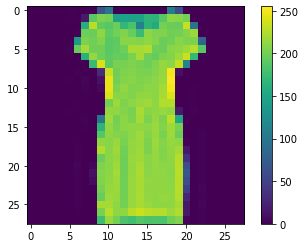

In [8]:
plt.figure()
plt.imshow(train_images[20])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

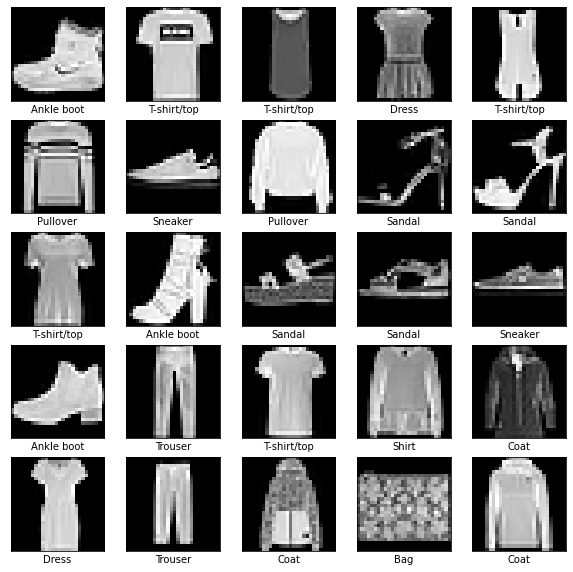

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model=tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28,28)),
                        tf.keras.layers.Dense(128,activation='relu'),
                        tf.keras.layers.Dense(10)
                          ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4993 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2931 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2572 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3417 - accuracy: 0.8759

Test accuracy: 0.8758999705314636


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([7.9729787e-09, 5.7424937e-12, 3.7802184e-08, 2.6820336e-12,
       9.9538848e-09, 7.3034054e-04, 6.0116342e-08, 1.9205896e-02,
       4.1708725e-07, 9.8006320e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

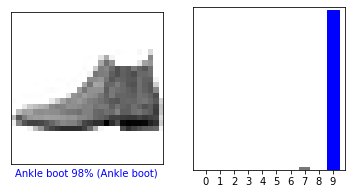

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

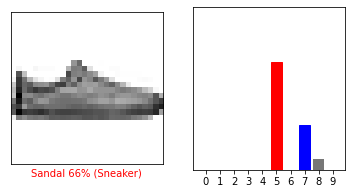

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

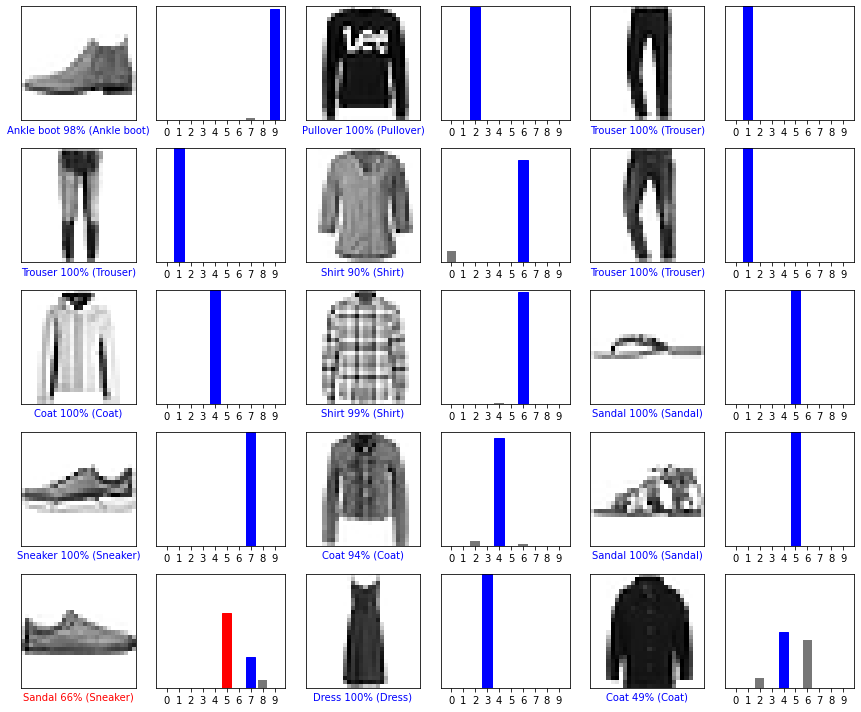

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()